In [19]:
# 참고자료
  # https://velog.io/@seobbang/Object-Detection-
   # https://clap0107.tistory.com/5
   # https://minmiin.tistory.com/14
  # https://velog.io/@obsidian0402/YOLOv5%EB%A5%BC-%ED%99%9C%EC%9A%A9%ED%95%9C-%EC%97%98%EB%A0%88%EB%B2%A0%EC%9D%B4%ED%84%B0-%EB%B2%84%ED%8A%BC-%ED%95%99%EC%8A%B5-1
    # https://stackoverflow.com/questions/62697400/assertionerror-file-not-found-yolov5

# 학습 데이터셋 (캐글): https://www.kaggle.com/datasets/ankan1998/weapon-detection-dataset

  # 추가 참고자료 https://ropiens.tistory.com/44\

In [1]:
# YOLO 객체인식 프로젝트 v1
# 참고 사료 : https://velog.io/@seobbang/Object-Detection-1

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content
!git clone https://github.com/ultralytics/yolov5

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 16057, done.
remote: Total 16057 (delta 0), reused 0 (delta 0), pack-reused 16057
Receiving objects: 100% (16057/16057), 14.66 MiB | 22.99 MiB/s, done.
Resolving deltas: 100% (11028/11028), done.


In [3]:
%cd /content/yolov5/
!pip install -r requirements.txt

/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.2/645.2 kB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.1 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.1.0 which is incompatible.


In [4]:
!pip install kaggle

!cp -fa /content/drive/MyDrive/Yolo_Project_v1/kaggle.json /content/yolov5/kaggle.json # 구글 드라이브에 올라간 kaggle api 파일 코랩 런타임으로 복사

In [5]:
# json 파일 이동시키기 - https://jaaamj.tistory.com/141
# %cd /content/yolov5/
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning이 발생하지 않도록 해줍니다.
!chmod 600 ~/.kaggle/kaggle.json
# 내가 참가한 대회 리스트 확인
!kaggle competitions list

ref                                                                               deadline             category            reward  teamCount  userHasEntered  
--------------------------------------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
https://www.kaggle.com/competitions/llm-detect-ai-generated-text                  2024-01-22 23:59:00  Featured          $110,000        812           False  
https://www.kaggle.com/competitions/open-problems-single-cell-perturbations       2023-11-30 23:59:00  Featured          $100,000        880           False  
https://www.kaggle.com/competitions/stanford-ribonanza-rna-folding                2023-12-07 23:59:00  Research          $100,000        549           False  
https://www.kaggle.com/competitions/optiver-trading-at-the-close                  2023-12-20 23:59:00  Featured          $100,000       2861           False  
https://www.kaggle.com/competitions/nfl-big-da

In [6]:
# 예시
%cd /content/
! kaggle datasets download -d ankan1998/weapon-detection-dataset

/content
 99% 483M/487M [00:06<00:00, 86.8MB/s]
100% 487M/487M [00:06<00:00, 78.8MB/s]


In [7]:
!unzip /content/weapon-detection-dataset.zip # 다운받은 압축 데이터셋 압축풀기

Archive:  /content/weapon-detection-dataset.zip
  inflating: Sohas_weapon-Detection/annotations/trainval.txt  
  inflating: Sohas_weapon-Detection/annotations/xmls/ABbframe00154.xml  
  inflating: Sohas_weapon-Detection/annotations/xmls/ABbframe00160.xml  
  inflating: Sohas_weapon-Detection/annotations/xmls/ABbframe00166.xml  
  inflating: Sohas_weapon-Detection/annotations/xmls/ABbframe00169.xml  
  inflating: Sohas_weapon-Detection/annotations/xmls/ABbframe00190.xml  
  inflating: Sohas_weapon-Detection/annotations/xmls/ABbframe00235.xml  
  inflating: Sohas_weapon-Detection/annotations/xmls/ABbframe00265.xml  
  inflating: Sohas_weapon-Detection/annotations/xmls/ABbframe00271.xml  
  inflating: Sohas_weapon-Detection/annotations/xmls/ABbframe00274.xml  
  inflating: Sohas_weapon-Detection/annotations/xmls/ABbframe00277.xml  
  inflating: Sohas_weapon-Detection/annotations/xmls/ABbframe00280.xml  
  inflating: Sohas_weapon-Detection/annotations/xmls/ABbframe00283.xml  
  inflating: 

In [8]:
!mv Sohas_weapon-Detection dataset # 압축 푼 데이터셋 디렉토리 이름변경 -> dataset

In [9]:
!touch /content/dataset/data.yaml # 리눅스 명령어로 data.yaml 파일 생성

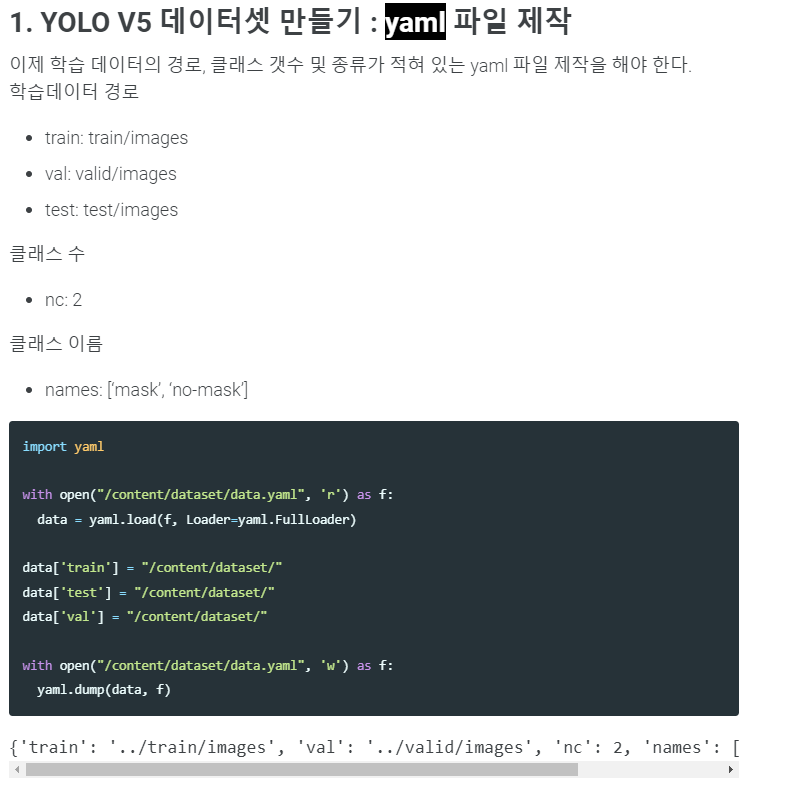

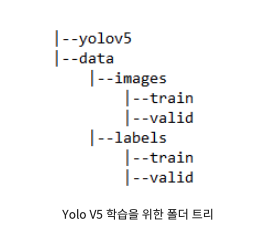

In [10]:
!mkdir /content/dataset/train

In [14]:
!mv /content/dataset/images /content/dataset/train/images

!mv /content/dataset/annotations /content/dataset/train/annotations

In [12]:
!mkdir /content/dataset/test

In [13]:
!mv /content/dataset/images_test /content/dataset/test/images_tset

!mv /content/dataset/annotations_test /content/dataset/test/annotations_test

In [ ]:
# import yaml

# with open("/content/dataset/data.yaml", 'r') as f:
#   data = yaml.load(f, Loader=yaml.FullLoader)

# # data['train'] = "/content/dataset/"
# # data['test'] = "/content/dataset/"
# # data['val'] = "/content/dataset/"
# data = {'path':'/content/dataset/', 'train':['img': 'annotations/trainval.txt', 'label': 'annotations'], 'val':'annotations_test/test.txt',
#         'nc': 1, 'names': ["knife"]}


# with open("/content/dataset/data.yaml", 'w') as f:
#   yaml.dump(data, f)

In [19]:
import yaml

# 탐지할 클래스의 개수
classes = 2
names = ['knife', 'billete']

# 학습 데이터의 경로
path = "/content/dataset"
train_img_dir = "train/images"
train_label_dir = "data/train/annotations"

# 검증 데이터의 경로
val_img_dir = "test/images"
val_label_dir = "test/annotations"

# data.yaml 파일 생성
with open("/content/dataset/data.yaml", "w") as f:
    data = {
        "path": path,
        "classes": classes,
        'names': names,
        "train": {
            "img": train_img_dir,
            "label": train_label_dir,
        },
        "val": {
            "img": val_img_dir,
            "label": val_label_dir,
        },
    }
    yaml.dump(data, f)


In [ ]:
# yaml 파일 생성 및 쓰기 자료 - https://abluesnake.tistory.com/128
  # 커스텀 데이터셋 학습시키기 - https://bong-sik.tistory.com/27


# !! yaml 파일 구조 - https://panggu15.github.io/detection/simple-Yolov5/
# 기존 참고자료에서 yaml 파일 구조 - https://velog.io/@seobbang/Object-Detection-1

# 디텍션 위치 (좌표) 표현 참고자료 - https://sguys99.github.io/ds01

# 부가적인 자료 - https://mvje.tistory.com/111
# 객체 학습 후 탐


In [20]:
%cd /content/yolov5/

!python  train.py --img 416 --batch 16 --epochs 10 --data /content/dataset/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name ball_yolov5s_result

/content/yolov5
2023-11-11 02:34:29.962212: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-11 02:34:29.962311: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-11 02:34:29.962408: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=./models/yolov5s.yaml, data=/content/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=Fals